Loaded and explored Mall Customer Dataset

In [1]:
# Load and explore the Mall Customers dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Check the structure of the data
print("Dataset shape:", df.shape)
print("\
Column names:")
print(df.columns.tolist())
print("\
First few rows:")
print(df.head())
print("\
Data types:")
print(df.dtypes)
print("\
Basic statistics:")
print(df.describe())

Dataset shape: (200, 5)
Column names:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Data types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
Basic statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     5

This code snippet loads the Mall Customers dataset and provides an overview of its structure, including shape, column names, first few rows, data types, and basic statistics.
- Load the dataset using pandas
- Print the shape of the dataset
- Print the column names
- Display the first few rows of the dataset
- Print the data types of each column
- Show basic statistics of the dataset

Determined Optimal clusters for customer segmentation

Missing values:
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


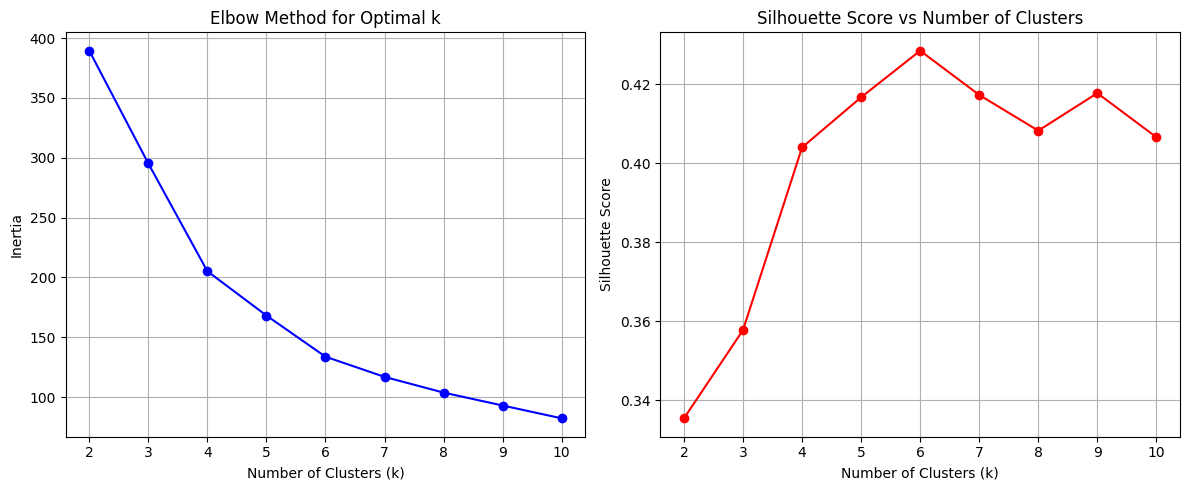

Silhouette scores for different k values:
k=2: 0.335
k=3: 0.358
k=4: 0.404
k=5: 0.417
k=6: 0.428
k=7: 0.417
k=8: 0.408
k=9: 0.418
k=10: 0.407


In [2]:
# Prepare data for clustering - use Age, Annual Income, and Spending Score
# Remove CustomerID and encode Gender if needed
clustering_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[clustering_features].copy()

# Check for missing values
print("Missing values:")
print(X.isnull().sum())

# Standardize the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("Silhouette scores for different k values:")
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}: {score:.3f}")

Applied K-Means Clustering and visualized Results

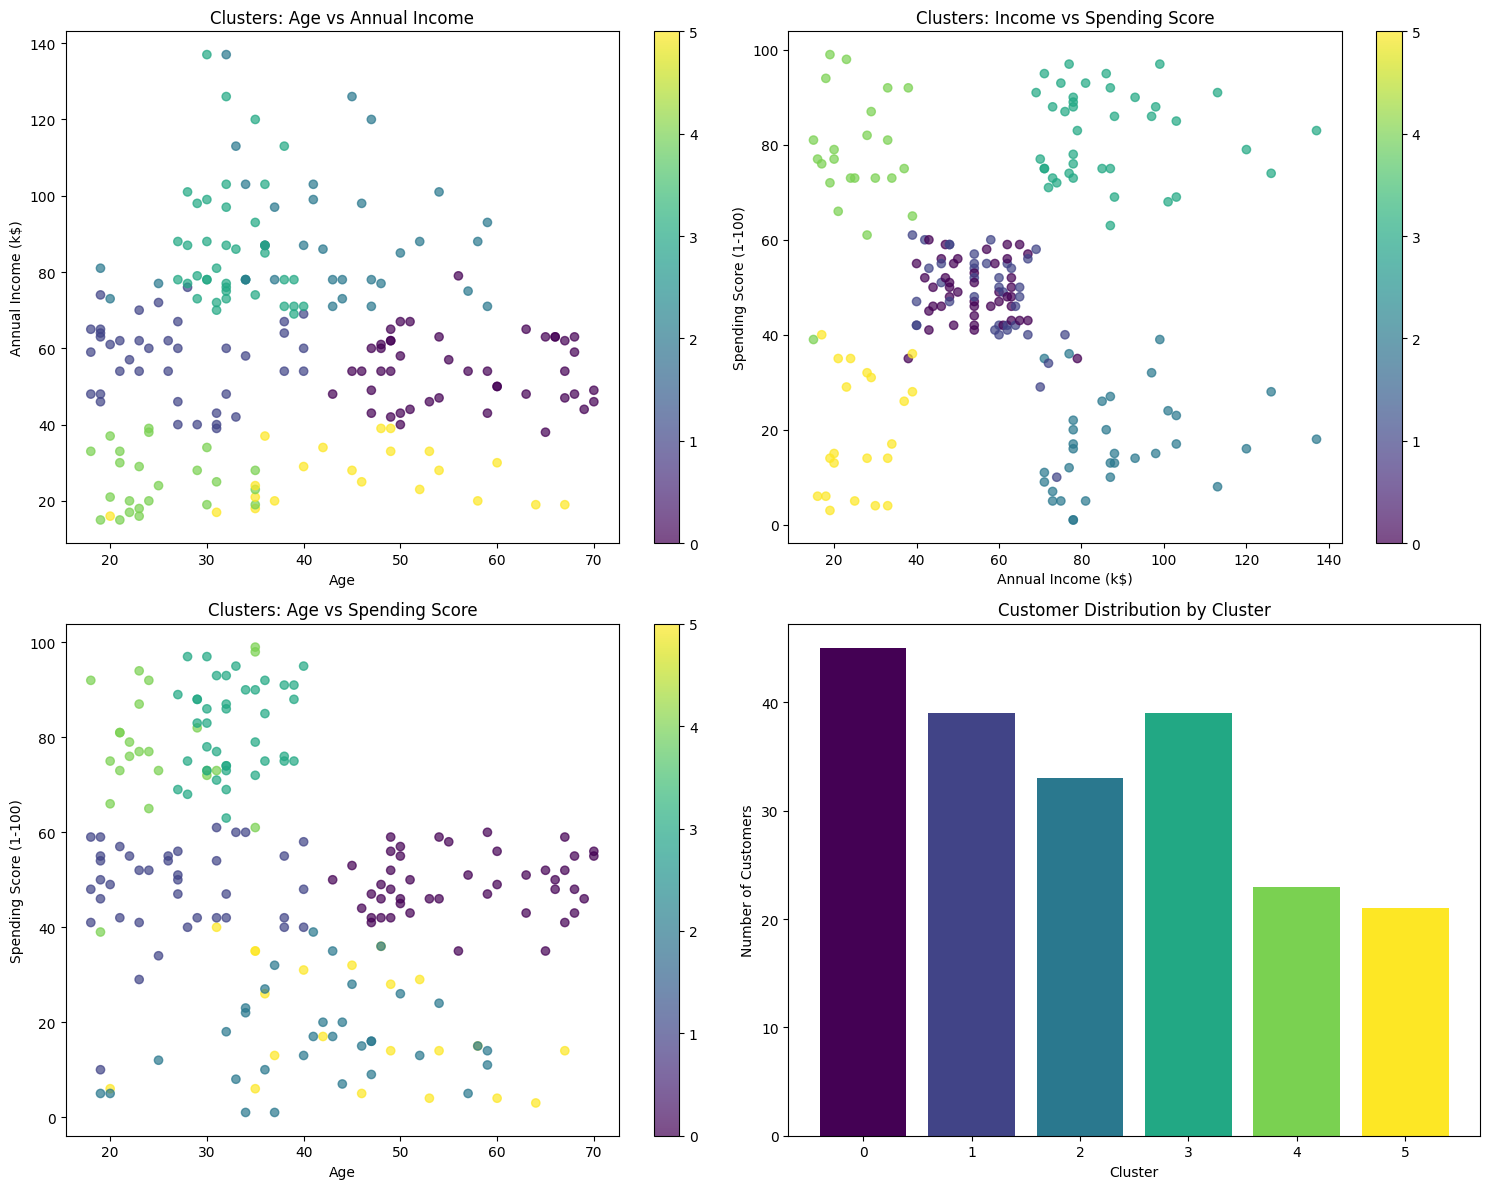

Cluster Analysis:
           Age        Annual Income (k$)        Spending Score (1-100)       
          mean    std               mean    std                   mean    std
Cluster                                                                      
0        56.33   8.45              54.27   8.98                  49.07   6.30
1        26.79   7.06              57.10  10.16                  48.13   9.97
2        41.94  10.18              88.94  16.59                  16.97   9.96
3        32.69   3.73              86.54  16.31                  82.13   9.36
4        25.00   5.30              25.26   7.72                  77.61  13.27
5        45.52  11.77              26.29   7.44                  19.38  12.56


In [3]:
# Apply K-means clustering with optimal k=6
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Age vs Annual Income
scatter1 = axes[0,0].scatter(df['Age'], df['Annual Income (k$)'], c=cluster_labels, cmap='viridis', alpha=0.7)
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Annual Income (k$)')
axes[0,0].set_title('Clusters: Age vs Annual Income')
plt.colorbar(scatter1, ax=axes[0,0])

# 2. Annual Income vs Spending Score
scatter2 = axes[0,1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', alpha=0.7)
axes[0,1].set_xlabel('Annual Income (k$)')
axes[0,1].set_ylabel('Spending Score (1-100)')
axes[0,1].set_title('Clusters: Income vs Spending Score')
plt.colorbar(scatter2, ax=axes[0,1])

# 3. Age vs Spending Score
scatter3 = axes[1,0].scatter(df['Age'], df['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', alpha=0.7)
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Spending Score (1-100)')
axes[1,0].set_title('Clusters: Age vs Spending Score')
plt.colorbar(scatter3, ax=axes[1,0])

# 4. Cluster distribution
cluster_counts = df['Cluster'].value_counts().sort_index()
axes[1,1].bar(range(optimal_k), cluster_counts.values, color=plt.cm.viridis(np.linspace(0, 1, optimal_k)))
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].set_title('Customer Distribution by Cluster')
axes[1,1].set_xticks(range(optimal_k))

plt.tight_layout()
plt.show()

# Analyze cluster characteristics
print("Cluster Analysis:")
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'std']).round(2)
print(cluster_summary)

his code snippet performed K-means clustering on customer data, visualized the clusters, and analyzed their characteristics.
- Set optimal number of clusters to 6.
- Fit K-means model to scaled data and predict cluster labels.
- Add cluster labels to the original dataframe.
- Create scatter plots to visualize relationships between Age, Annual Income, and Spending Score colored by cluster.
- Generate a bar chart to show the distribution of customers across clusters.
- Summarize and print the mean and standard deviation of Age, Annual Income, and Spending Score for each cluster.

MARKETING STRATEGIES BY CLUSTER
Cluster 0: Mature Moderates

Profile: Older customers (56y) with moderate income ($54k) and spending (49)

Strategy: Focus on quality, reliability, and value. Target with premium products that offer long-term benefits.

Cluster 1: Young Moderates

Profile: Young customers (27y) with moderate income ($57k) and spending (48)

Strategy: Digital marketing, trendy products, social media campaigns. Focus on lifestyle and experiences.

Cluster 2: High Value Customers

Profile: Young-middle aged (33y) with high income ($87k) and high spending (82)

Strategy: VIP treatment, premium services, loyalty programs. Cross-sell and upsell opportunities.

Cluster 4: Budget Enthusiasts

Profile: Young customers (25y) with low income ($25k) but high spending (78)

Strategy: Affordable luxury, payment plans, student discounts. Focus on aspirational products.


Cluster 5: Conservative Savers

Profile: Middle-aged (46y) with low income ($26k) and low spending (19)

Strategy: Value deals, discounts, practical products. Emphasize savings and necessity.


